<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# import numpy as np

# http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

import numpy as np
import pandas as pd


data = {'hr': [1,2,3,4,5,6,7,8,9,10,11,12], 'mnth': [1,2,3,4,5,6,7,8,9,10,11,12]}

df = pd.DataFrame()
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

In [18]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [20]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [21]:
df

,hr,hr_sin,hr_cos
0,1,2.588190e-01,9.659258e-01
1,2,5.000000e-01,8.660254e-01
2,3,7.071068e-01,7.071068e-01
3,4,8.660254e-01,5.000000e-01
4,5,9.659258e-01,2.588190e-01
5,6,1.000000e+00,6.123234e-17
6,7,9.659258e-01,-2.588190e-01
7,8,8.660254e-01,-5.000000e-01
8,9,7.071068e-01,-7.071068e-01
9,10,5.000000e-01,-8.660254e-01


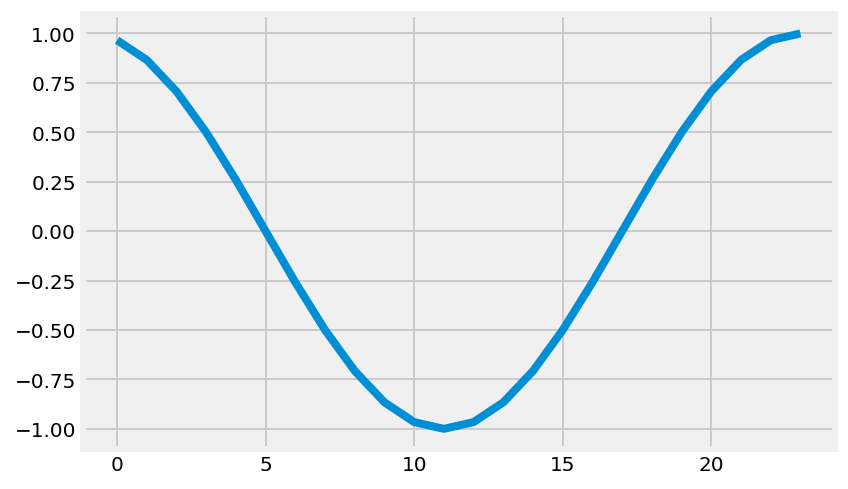

In [24]:
df.hr_cos.plot()

In [26]:
import matplotlib.pyplot as plt

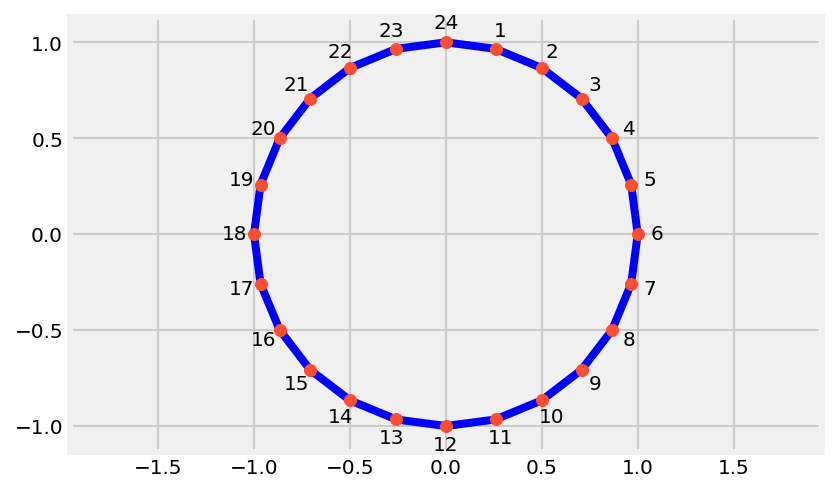

In [97]:
plt.axis('equal')
plt.fill(df['hr_sin'],df['hr_cos'], lw=4, ec='b', fill=False)
plt.scatter(df['hr_sin'],df['hr_cos'], label= df['hr'], zorder=10)#, lw=4, ec='b', fill=False)

for i, txt in enumerate(hr):
    plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.10, df['hr_cos'][i]*1.10),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')


In [72]:
for i, txt in enumerate(hr):
    print(i, txt, (df['hr_sin'][i], df['hr_cos'][i]))

0 1 (0.25881904510252074, 0.9659258262890683)
1 2 (0.49999999999999994, 0.8660254037844387)
2 3 (0.7071067811865475, 0.7071067811865476)
3 4 (0.8660254037844386, 0.5000000000000001)
4 5 (0.9659258262890682, 0.25881904510252096)
5 6 (1.0, 6.123233995736766e-17)
6 7 (0.9659258262890683, -0.25881904510252063)
7 8 (0.8660254037844388, -0.4999999999999998)
8 9 (0.7071067811865476, -0.7071067811865475)
9 10 (0.5000000000000003, -0.8660254037844385)
10 11 (0.258819045102521, -0.9659258262890682)
11 12 (1.2246467991473532e-16, -1.0)
12 13 (-0.25881904510252035, -0.9659258262890684)
13 14 (-0.4999999999999998, -0.8660254037844388)
14 15 (-0.7071067811865471, -0.7071067811865479)
15 16 (-0.8660254037844384, -0.5000000000000004)
16 17 (-0.9659258262890681, -0.25881904510252146)
17 18 (-1.0, -1.8369701987210297e-16)
18 19 (-0.9659258262890684, 0.2588190451025203)
19 20 (-0.866025403784439, 0.4999999999999993)
20 21 (-0.7071067811865477, 0.7071067811865475)
21 22 (-0.5000000000000004, 0.86602540378

In [106]:
!ls CookBooks/Sources/

AdaBoostPicture.png       aurelien.jpeg             meme-books.png
DataScienceDefCricl.png   boosted-trees-process.png newton-right.jpg
README.md                 ga-natural-selection.png  turnover.xlsx
ShapeFiles                image.png                 ~$turnover.xlsx


In [109]:
path = '/Users/maartenk/Documents/git/CookBooks/Sources/'
file = 'turnover.xlsx'


In [111]:
df = pd.read_excel(path+file)

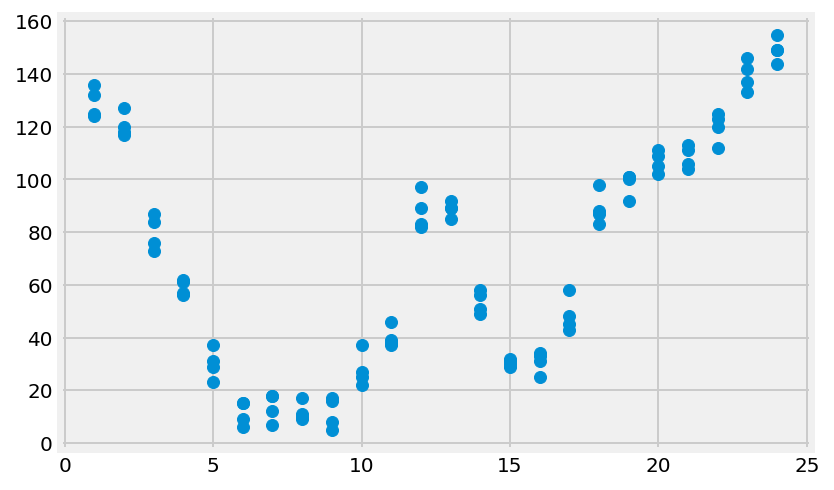

In [115]:
plt.scatter(df['hr'], df['turnover'])

In [137]:
import seaborn as sns

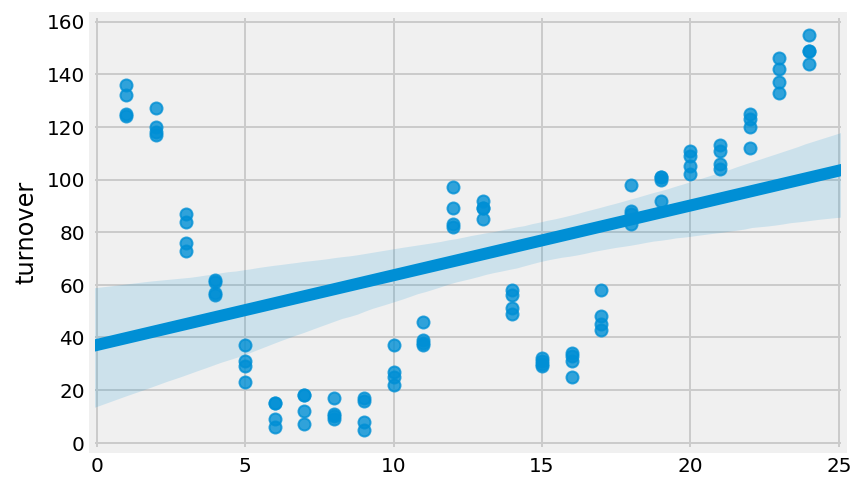

In [139]:
sns.regplot(df[['hr']], df['turnover'])

In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr']], df[['turnover']])
model.score(df[['hr']], df[['turnover']])

0.1733796432227398

In [123]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
model = LinearRegression()

model.fit(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))
model.score(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

0.17337964322273972

In [125]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [127]:
df.columns

Index(['hr', 'turnover', 'hr_sin', 'hr_cos'], dtype='object')

In [141]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr_sin', 'hr_cos']], df[['turnover']])
model.score(df[['hr_sin', 'hr_cos']], df[['turnover']])

0.635885836759986

In [130]:
X = pd.get_dummies(df['hr'])

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, df[['turnover']])
model.score(X, df[['turnover']])

0.9898820731294891

In [132]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

for m in ['d', '+', '|']:

    for i in range(24):
        a1, a2  = (df['hr_sin'],df['hr_cos'])
        angle = np.linspace(0,360,24)

        # make a markerstyle class instance and modify its transform prop
        t = mpl.markers.MarkerStyle(marker=m)
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter((a1), (a2), marker=t, s=100)

ValueError: setting an array element with a sequence.

In [149]:
np.linspace(0,360,24)

array([  0.        ,  15.65217391,  31.30434783,  46.95652174,
        62.60869565,  78.26086957,  93.91304348, 109.56521739,
       125.2173913 , 140.86956522, 156.52173913, 172.17391304,
       187.82608696, 203.47826087, 219.13043478, 234.7826087 ,
       250.43478261, 266.08695652, 281.73913043, 297.39130435,
       313.04347826, 328.69565217, 344.34782609, 360.        ])

In [152]:
a1, a2  = np.random.random(2)

In [154]:
np.random.choice([180, 45, 90, 35])

90